<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true"
width="260" height="110" /></p>

---

---
<a name = Section1></a>
## **1. Project Description**

<a id = Section11></a>
### 1.1 Problem Statement

#### This project is the for HR Department at a software company.

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.

#### Current Practice & problems associated with it:
- Once an employee leaves, he or she is taken an interview with the name “Exit Interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

  Associated problems:
- This approach is too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- Insights can't be aggregated and interlaced across all employees who have left.
- It can be too late by the time the proposed policy changes take effect.

The HR department has turned to data science consultant which would supplement their exit interviews with a more proactive approach.

---

---
<a id = Section2></a>
## 2. Installing & Importing Libraries

In [ ]:
!pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 4.2 MB/s 
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp37-cp37m-linux_x86_64.whl size=249476 sha256=968d1c57f23500ffa8d6d9490852635d273244ac61853f8c69b332a7c05d8c15
  Stored in directory: /root/.cache/pip/wheels/68/59/cf/3b03557b26b4c75af3788a553e0ff9cf0b37a22d0c9cb01979
Successfully built mysql-connector-python-rf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

---
<a name = Section3></a>
## **3. Data Acquisition & Description**

<a id = Section31></a>
### 3.1 Importing "department_data" table from SQL database

In [ ]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database="Capstone2"
)

mycursor = mydb.cursor()

mycursor.execute("select * from department_data")
myresult = mycursor.fetchall()
df_department_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_department_data.columns = field_names

df_department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


<a id = Section32></a>
### 3.2 Importing   "employee_details_data" table from SQL database

In [ ]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database="Capstone2"
)

mycursor = mydb.cursor()

mycursor.execute("select * from employee_details_data")
myresult = mycursor.fetchall()
df_employee_details_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_employee_details_data.columns = field_names

df_employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


<a id = Section33></a>
### 3.3 Importing   "employee_data" table from SQL database

In [ ]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database="Capstone2"
)

mycursor = mydb.cursor()

mycursor.execute("select * from employee_data")
myresult = mycursor.fetchall()
df_employee_data = pd.DataFrame(myresult)

field_names = [i[0] for i in mycursor.description]
df_employee_data.columns = field_names

df_employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707


<a id = Section34></a>
### 3.4 Data Description

The three datasets contain information about employees and their status (still employed or already left).

1. **department_data**
    
    This dataset contains information about each department. The schema of the dataset is as follows:

    - dept_id – Unique Department Code
    - dept_name – Name of the Department
    - dept_head – Name of the Head of the Department
    

2. **employee_details_data**

    This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

    - employee_id – Unique ID Number for each employee
    - age – Age of the employee
    - gender – Gender of the employee
    - marital_status – Marital Status of the employee


3. **employee_data**

    This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status as follows:
    
 
**Administrative information**

- **department** – Department to which the employees belong(ed) to
- **salary** – Salary level with respect to rest of their department
- **tenure** – Number of years at the company
- **recently_promoted** – Was the employee promoted in the last 3 years?
- **employee_id** – Unique ID Number for each employee
    
    
**Workload information**

- **n_projects** – Number of projects employee has worked on
- **avg_monthly_hrs** – Average number of hours worked per month
    
    
**Mutual evaluation information**

- **satisfaction** – Score for employee’s satisfaction with the company (higher is better)
- **last_evaluation** – Score for most recent evaluation of employee (higher is better)
- **filed_complaint** – Has the employee filed a formal complaint in the last 3 years?


**Target variable**

- **status** – Current employment status (Employed / Left)
    
  

---
<a name = Section4></a>
## **4. Understanding Project Datasets**

<a id = Section41></a>
### 4.1 Understand Dataset: department_data

In [ ]:
df_department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [ ]:
df_department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
df_department_data.isnull().sum().sort_values(ascending=False)

dept_id      0
dept_name    0
dept_head    0
dtype: int64

- 'department_data' consists of 3 Columns and 11 Rows with no missing data

In [ ]:
df_department_data.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [ ]:
df_department_data['dept_id'].value_counts()

D00-IT     1
D00-SS     1
D00-TP     1
D00-ENG    1
D00-SP     1
D00-FN     1
D00-PR     1
D00-AD     1
D00-MN     1
D00-MT     1
D00-PD     1
Name: dept_id, dtype: int64

In [ ]:
df_department_data['dept_name'].value_counts()

IT             1
Sales          1
Temp           1
Engineering    1
Support        1
Finance        1
Procurement    1
Admin          1
Management     1
Marketing      1
Product        1
Name: dept_name, dtype: int64

In [ ]:
df_department_data['dept_head'].value_counts()

Henry Adey               1
Edward J Bayley          1
Micheal Zachrey          1
Sushant Raghunathan K    1
Amelia Westray           1
Aanchal J                1
Louie Viles              1
Evelyn Tolson            1
Ellie Trafton            1
Reuben Swann             1
Darcy Staines            1
Name: dept_head, dtype: int64

- In the 'department_data', there are 11 UNIQUE 'Department ID' having all different UNIQUE 'Department Name' headed by 11 different 'Department Heads'

<a id = Section42></a>
### 4.2 Understand Dataset: employee_details_data

In [ ]:
df_employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
df_employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
df_employee_details_data.isnull().sum().sort_values(ascending=False)

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

- 'employee_details_data' consists of 4 Columns and 14,245 Rows with no missing data

In [ ]:
df_employee_details_data.describe(include='all')

,employee_id,age,gender,marital_status
count,14245.000000,14245.000000,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.050544,32.889926,NaN,NaN
std,8500.457343,9.970834,NaN,NaN
min,100101.000000,22.000000,NaN,NaN
25%,105775.000000,24.000000,NaN,NaN
50%,111298.000000,29.000000,NaN,NaN
75%,116658.000000,41.000000,NaN,NaN


In [ ]:
df_employee_details_data['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

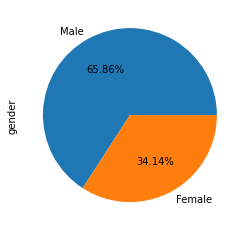

In [ ]:
df_employee_details_data['gender'].value_counts().plot(kind='pie', autopct='%.2f%%');

- From gender column, we have seen that 9,382 employees are males which accounts for 65.86% of the sample while 4,863 employees are females which accounts for 34.14% of the sample.

---

In [ ]:
df_employee_details_data['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

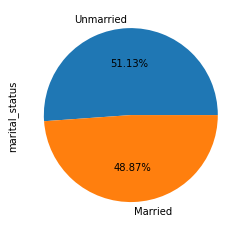

In [ ]:
df_employee_details_data['marital_status'].value_counts().plot(kind='pie', autopct='%.2f%%');

- From marital status column, we have seen that 7,283 employees are Unmarried which accounts for 51.13% of the sample while 6,962 employees are Married which accounts for 48.87% of the sample.

---

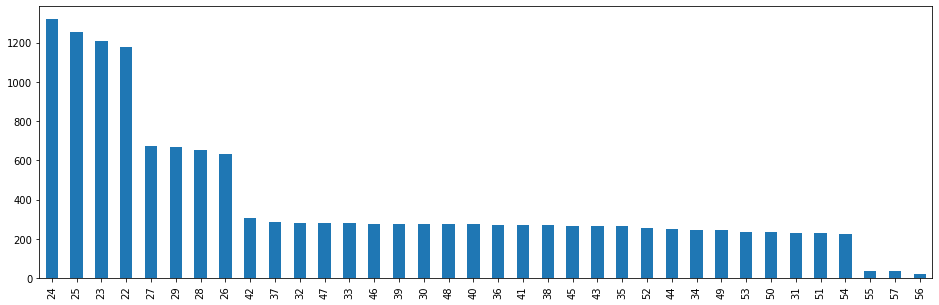

In [ ]:
df_employee_details_data['age'].value_counts().plot(kind='bar', figsize=(16,5));

- Age of the employee ranges from 22 Years to 57 Years and most of the employee are from age group 22-29 years.

<a id = Section43></a>
### 4.3 Understand Dataset: employee_data

In [ ]:
df_employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707


In [ ]:
df_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  object 
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   object 
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [ ]:
df_employee_data.isnull().sum().sort_values(ascending=False)

recently_promoted    13853
filed_complaint      12104
last_evaluation       1487
department             707
satisfaction           150
tenure                 150
avg_monthly_hrs          0
n_projects               0
salary                   0
status                   0
employee_id              0
dtype: int64

- **employee_detail_data (14,245) has 95 more entry comapred to employee_data (14,150)**
- **department has 707 missing data, which is a major concern as 'department' is primary column for merging data**
- **Department column heading is different**

In [ ]:
df_employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

- **department column has 707 missing data as well as it has 12 unique value. But it has one '-IT' entry (having 207 entry) apart from 'D00-IT', which I feel it would be part of 'D00-IT'.**

In [ ]:
df_employee_data.replace(to_replace='-IT', value='D00-IT', inplace=True)

In [ ]:
df_employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

- **In 'department_data', Column Name of Department ID is 'dept_id' whereas same Column Name of Department ID in 'employee_data' is department. So, in order to merge data from both dataset, we need same column name. Thus, we are changing column name in employee_data to dept_id from department.**

In [ ]:
df_employee_data = df_employee_data.rename({'department':'dept_id'}, axis=1)
df_employee_data.head()

,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,None,0.866838,6,NaN,medium,0.134415,Left,4.00,124467
1,134.00,None,None,0.555718,2,NaN,low,0.511041,Left,3.00,112210
2,156.00,D00-SS,1.00,0.474082,2,NaN,medium,0.405101,Left,3.00,126150
3,256.00,D00-SP,None,0.961360,6,NaN,low,0.152974,Left,4.00,125346
4,146.00,D00-SS,None,0.507349,2,NaN,medium,0.434845,Left,3.00,113707


---
<a name = Section5></a>
## **5. Merging of Datasets**

- **Merging of department_data and employee_data**

In [ ]:
df_merged1 = pd.merge(left=df_department_data, right=df_employee_data, on='dept_id', how='outer')
df_merged1.head()

,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,D00-IT,IT,Henry Adey,244.00,None,0.926197,6,NaN,medium,0.061868,Left,5.00,112868
1,D00-IT,IT,Henry Adey,289.00,None,0.929858,7,NaN,low,0.161744,Left,4.00,122314
2,D00-IT,IT,Henry Adey,235.00,None,0.957642,5,NaN,low,0.725715,Left,5.00,126561
3,D00-IT,IT,Henry Adey,158.00,None,0.546333,2,NaN,low,0.391487,Left,3.00,115017
4,D00-IT,IT,Henry Adey,277.00,None,0.949600,2,NaN,medium,0.723212,Left,3.00,112281


In [ ]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dept_id            13443 non-null  object 
 1   dept_name          13443 non-null  object 
 2   dept_head          13443 non-null  object 
 3   avg_monthly_hrs    14150 non-null  object 
 4   filed_complaint    2046 non-null   object 
 5   last_evaluation    12663 non-null  float64
 6   n_projects         14150 non-null  int64  
 7   recently_promoted  297 non-null    float64
 8   salary             14150 non-null  object 
 9   satisfaction       14000 non-null  float64
 10  status             14150 non-null  object 
 11  tenure             14000 non-null  object 
 12  employee_id        14150 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.5+ MB


- **Now merging 'employee_details_data' with the first merged dataset**

In [ ]:
df_final = pd.merge(left=df_employee_details_data, right=df_merged1, on='employee_id', how='right')
df_final.head()

,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,112868,29.0,Female,Married,D00-IT,IT,Henry Adey,244.00,None,0.926197,6,NaN,medium,0.061868,Left,5.00
1,122314,36.0,Female,Married,D00-IT,IT,Henry Adey,289.00,None,0.929858,7,NaN,low,0.161744,Left,4.00
2,126561,22.0,Female,Unmarried,D00-IT,IT,Henry Adey,235.00,None,0.957642,5,NaN,low,0.725715,Left,5.00
3,115017,24.0,Female,Unmarried,D00-IT,IT,Henry Adey,158.00,None,0.546333,2,NaN,low,0.391487,Left,3.00
4,112281,28.0,Male,Unmarried,D00-IT,IT,Henry Adey,277.00,None,0.949600,2,NaN,medium,0.723212,Left,3.00


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14150 non-null  int64  
 1   age                14145 non-null  float64
 2   gender             14145 non-null  object 
 3   marital_status     14145 non-null  object 
 4   dept_id            13443 non-null  object 
 5   dept_name          13443 non-null  object 
 6   dept_head          13443 non-null  object 
 7   avg_monthly_hrs    14150 non-null  object 
 8   filed_complaint    2046 non-null   object 
 9   last_evaluation    12663 non-null  float64
 10  n_projects         14150 non-null  int64  
 11  recently_promoted  297 non-null    float64
 12  salary             14150 non-null  object 
 13  satisfaction       14000 non-null  float64
 14  status             14150 non-null  object 
 15  tenure             14000 non-null  object 
dtypes: float64(4), int64(2

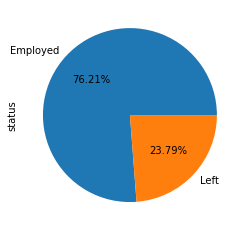

In [ ]:
df_final.status.value_counts().plot(kind = 'pie', autopct='%.2f%%')

---
<a id = Section6></a>
## **6. Feature Engineering**



In [ ]:
df_final.isnull().sum().sort_values(ascending=False)

recently_promoted    13853
filed_complaint      12104
last_evaluation       1487
dept_id                707
dept_name              707
dept_head              707
satisfaction           150
tenure                 150
age                      5
gender                   5
marital_status           5
employee_id              0
avg_monthly_hrs          0
n_projects               0
salary                   0
status                   0
dtype: int64

In [ ]:
missing_data = pd.DataFrame(df_final.isnull().sum(), columns=['Total Missing Values'])
missing_data['% of Missing Values'] = df_final.isnull().sum() / len(df_final) * 100
missing_data = missing_data.sort_values(by = '% of Missing Values', ascending=False)
missing_data

,Total Missing Values,% of Missing Values
recently_promoted,13853,97.901060
filed_complaint,12104,85.540636
last_evaluation,1487,10.508834
dept_id,707,4.996466
dept_name,707,4.996466
dept_head,707,4.996466
satisfaction,150,1.060071
tenure,150,1.060071
age,5,0.035336
gender,5,0.035336


- **recently_promoted** has 13,853 missing data (14,150-13853) i.e., 297 got promotion recently and remaining weren't promoted. So, replacing NULL value with '0'.


- **filed_complaint** has 12,104 missing value which means 12,104 employee has not filed any complaint. So, replacing NULL value with '0'.


- **last_evaluation**, **satisfaction**, **tenure**, **age**, **gender**, **marital_status**: The missing values will be replaced with **Median** for continuous variables and **Mode** for categorical ones.


- **dept_id, dept_name and dept_head** have 707 each missing value, which is nearly 5% of the dataset and if we fill it with **Mode**, it may create imbalance in the data. So, to replace missing value creating one **missing_dept** with **dept_id: D00-XX** and **dept_head: missing_head**.

<a id = Section61></a>
### 6.1 Replacing Missing Values:

- Replacing **null value** of **'recently_promoted'** and **'filed_complaint'** with **'0.0'**.

In [ ]:
df_final['recently_promoted'].fillna('0.0', inplace=True)

In [ ]:
df_final['filed_complaint'].fillna('0.00', inplace=True)

- Replacing **last_evaluation, satisfaction, dept_id, dept_name, dept_head, tenure, age, gender and marital_status** with **Mean / Median / Mode**

In [ ]:
df_final['last_evaluation'].fillna(df_final['last_evaluation'].median(), inplace=True)
df_final['satisfaction'].fillna(df_final['satisfaction'].median(), inplace=True)
df_final['tenure'].fillna(df_final['tenure'].median(), inplace=True)
df_final['age'].fillna(df_final['age'].median(), inplace=True)
df_final['gender'].fillna(df_final['gender'].mode()[0], inplace=True)
df_final['marital_status'].fillna(df_final['marital_status'].mode()[0], inplace=True)

In [ ]:
df_final['dept_id'].fillna('D00-XX', inplace=True)
df_final['dept_name'].fillna('missing_dept', inplace=True)
df_final['dept_head'].fillna('missing_head', inplace=True)

In [ ]:
#converting object columns:   filed_complaint, recently_promoted, tenure
df_final['avg_monthly_hrs'] = df_final['avg_monthly_hrs'].astype(float)
df_final['filed_complaint'] = df_final['filed_complaint'].astype(float)
df_final['recently_promoted'] = df_final['recently_promoted'].astype(float)
df_final['tenure'] = df_final['tenure'].astype(float)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14149
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14150 non-null  int64  
 1   age                14150 non-null  float64
 2   gender             14150 non-null  object 
 3   marital_status     14150 non-null  object 
 4   dept_id            14150 non-null  object 
 5   dept_name          14150 non-null  object 
 6   dept_head          14150 non-null  object 
 7   avg_monthly_hrs    14150 non-null  float64
 8   filed_complaint    14150 non-null  float64
 9   last_evaluation    14150 non-null  float64
 10  n_projects         14150 non-null  int64  
 11  recently_promoted  14150 non-null  float64
 12  salary             14150 non-null  object 
 13  satisfaction       14150 non-null  float64
 14  status             14150 non-null  object 
 15  tenure             14150 non-null  float64
dtypes: float64(7), int64(2

In [ ]:
df_final['dept_id'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-XX      707
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: dept_id, dtype: int64

In [ ]:
df_final['dept_name'].value_counts()

Sales           3905
Engineering     2575
Support         2113
IT              1364
Product          855
Marketing        815
Finance          725
missing_dept     707
Management       593
Admin            175
Procurement      173
Temp             150
Name: dept_name, dtype: int64

In [ ]:
df_final['dept_head'].value_counts()

Edward J Bayley          3905
Sushant Raghunathan K    2575
Amelia Westray           2113
Henry Adey               1364
Darcy Staines             855
Reuben Swann              815
Aanchal J                 725
missing_head              707
Ellie Trafton             593
Evelyn Tolson             175
Louie Viles               173
Micheal Zachrey           150
Name: dept_head, dtype: int64

<a id = Section62></a>
### 6.2 Duplicate Entry in employee_id

In [ ]:
df_final.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14149
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14121 non-null  int64  
 1   age                14121 non-null  float64
 2   gender             14121 non-null  object 
 3   marital_status     14121 non-null  object 
 4   dept_id            14121 non-null  object 
 5   dept_name          14121 non-null  object 
 6   dept_head          14121 non-null  object 
 7   avg_monthly_hrs    14121 non-null  float64
 8   filed_complaint    14121 non-null  float64
 9   last_evaluation    14121 non-null  float64
 10  n_projects         14121 non-null  int64  
 11  recently_promoted  14121 non-null  float64
 12  salary             14121 non-null  object 
 13  satisfaction       14121 non-null  float64
 14  status             14121 non-null  object 
 15  tenure             14121 non-null  float64
dtypes: float64(7), int64(2

---
<a id = Section7></a>
## **7. Data Analysis / Visualization of various Feature Columns** 

In [ ]:
df_final['status'].value_counts()

Employed    10763
Left         3358
Name: status, dtype: int64

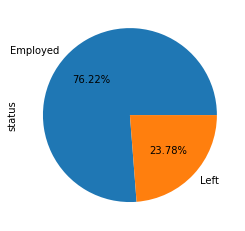

In [ ]:
df_final['status'].value_counts().plot(kind='pie', autopct='%.2f%%')

<a id = Section71></a>
#### 7.1 Analysis of Employment Status with Employee's Age

Text(0.5, 1.0, 'Bar Chart showing Age-wise Employment Status')

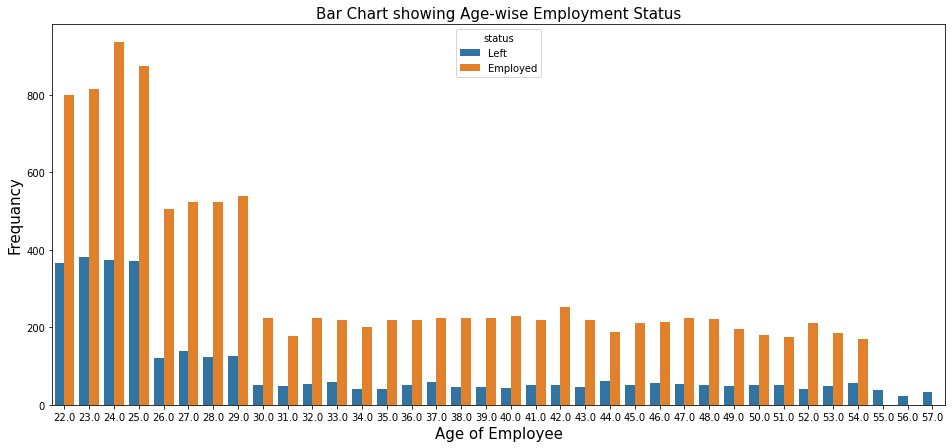

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x = 'age', hue = 'status', data = df_final);
plt.xlabel('Age of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Age-wise Employment Status', fontsize=15)

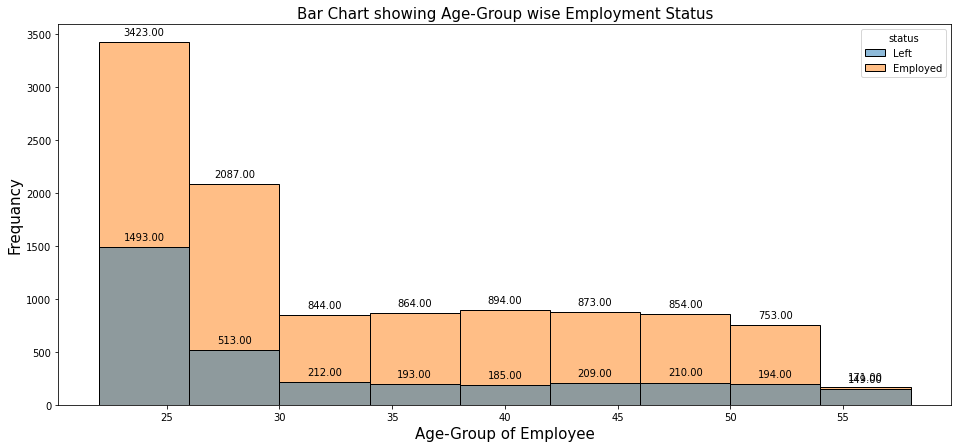

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.histplot(x = 'age', hue = 'status', data = df_final, binwidth=4);
plt.xlabel('Age-Group of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Age-Group wise Employment Status', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Analysis of 'AGE' gives an indication that only in the Age-Group 22-25 years attirition is very high at 30.4% as most of them are freshers so they changes jobs very frequently. From Age-Group 26-29 to 50-53 years, attirition is between 17% to 20.5%. In Age-Group 54-57 years, attirition is low.

<a id = Section72></a>
#### 7.2 Analysis of Employment Status with Employee's Gender

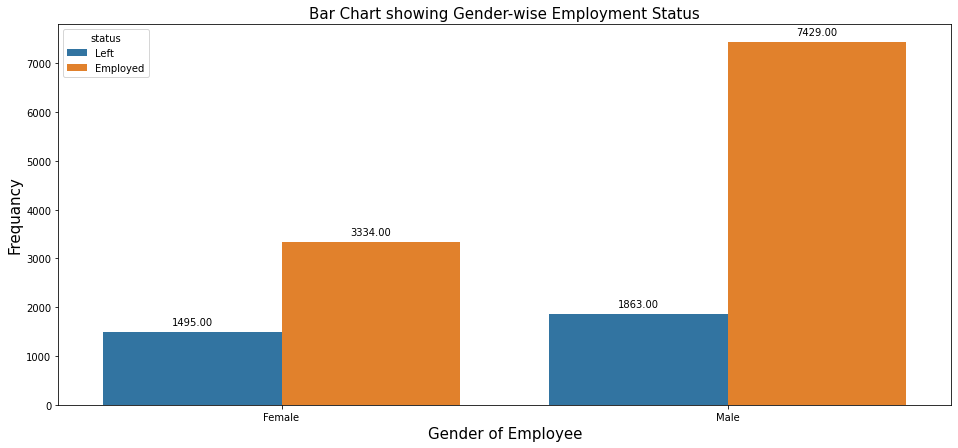

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'gender', hue = 'status', data = df_final);
plt.xlabel('Gender of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Gender-wise Employment Status', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Gender Analysis is giving indication that Female has much higher attirition level at 30.9% as against Male at 20.1%

<a id = Section73></a>
#### 7.3 Analysis of Employment Status with Employee's Marital Status

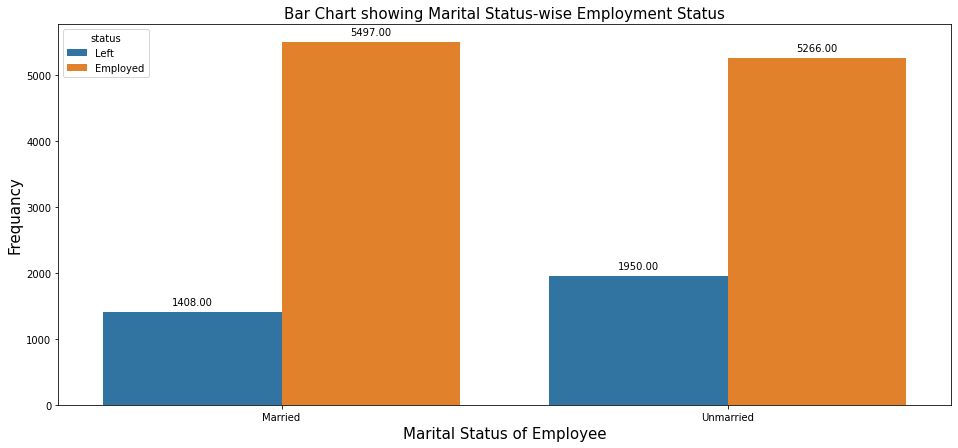

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'marital_status', hue = 'status', data = df_final);
plt.xlabel('Marital Status of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Marital Status-wise Employment Status', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Marital Status of Employee is giving indication that attirition is quite high in Unmarried at 27% against 20.4% in Married

<a id = Section74></a>
#### 7.4 Analysis of Employment Status with Employee's Salary

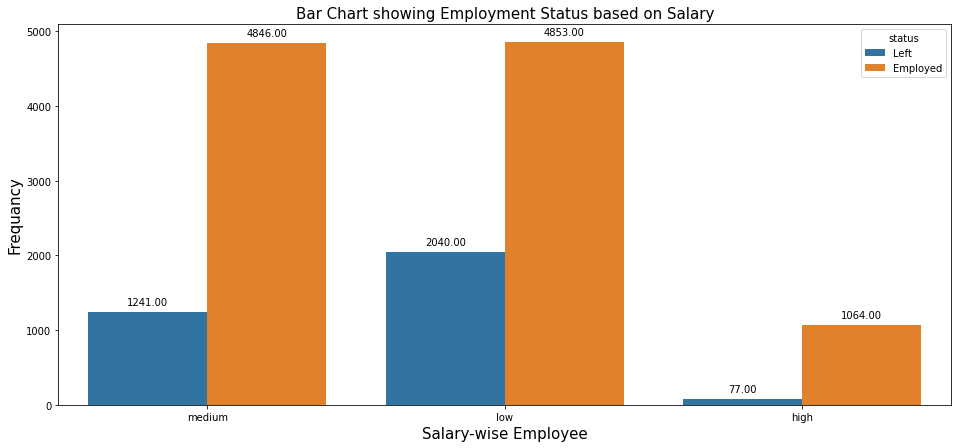

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'salary', hue = 'status', data = df_final);
plt.xlabel('Salary-wise Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Employment Status based on Salary', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Salary of Employee plays a vital role on attirition as Low Salaried has 29.6% while Higher salaried has very low at 6.7% attirition

<a id = Section75></a>
#### 7.5 Analysis of Employment Status with Employee's Avg. Monthly Hours

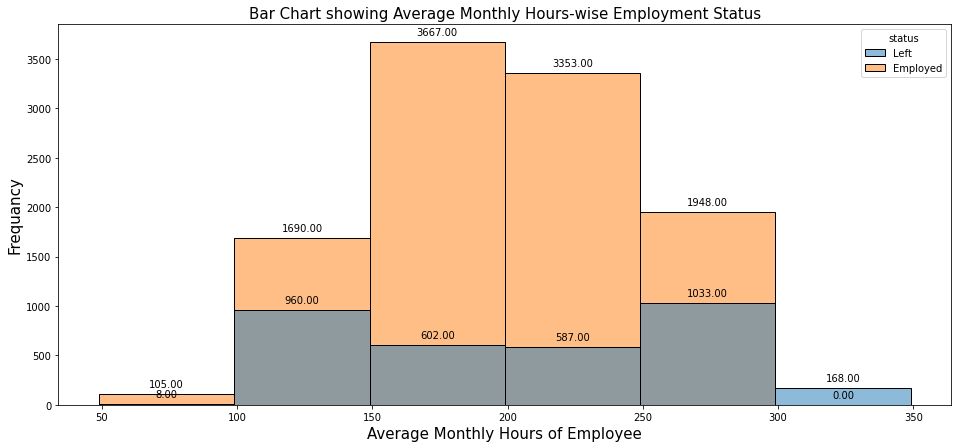

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.histplot(x='avg_monthly_hrs', hue = 'status', data = df_final, binwidth=50)
plt.xlabel('Average Monthly Hours of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Average Monthly Hours-wise Employment Status', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Analysis of Average Monthly Hour clearly shows that Over 250 Hours has significantly higher attirition rate, but we can see that lower monthly hour between 100-150 hours also has hign attirition level may be becouse they have more time for JOB SEARCH.

<a id = Section76></a>
#### 7.6 Analysis of Employment Status with Employee's Number of Projects

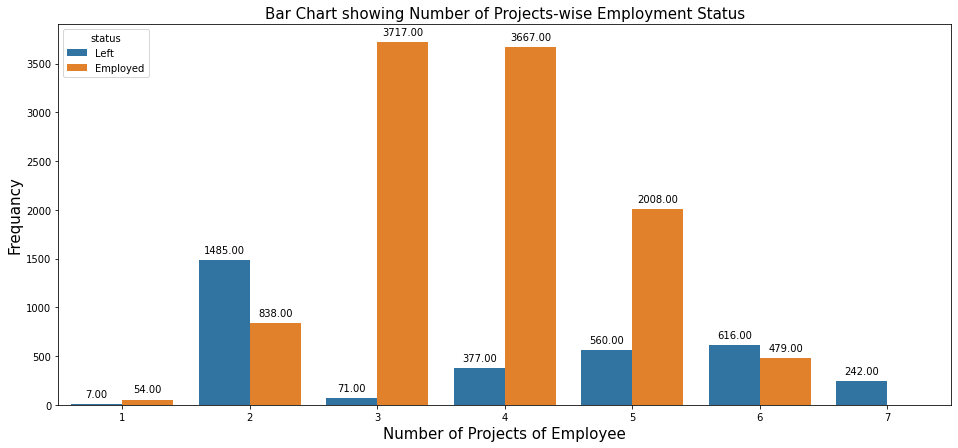

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'n_projects', hue = 'status', data = df_final);
plt.xlabel('Number of Projects of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Number of Projects-wise Employment Status', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Analysis of Number of Projects also give similar indication what Monthly Hours gave that over 6 Project, attirition level is but-obvious very high. But employee having 2 projects also have very high attirition.

<a id = Section77></a>
#### 7.7 Analysis of Employment Status with Employee's Tenure with the Company

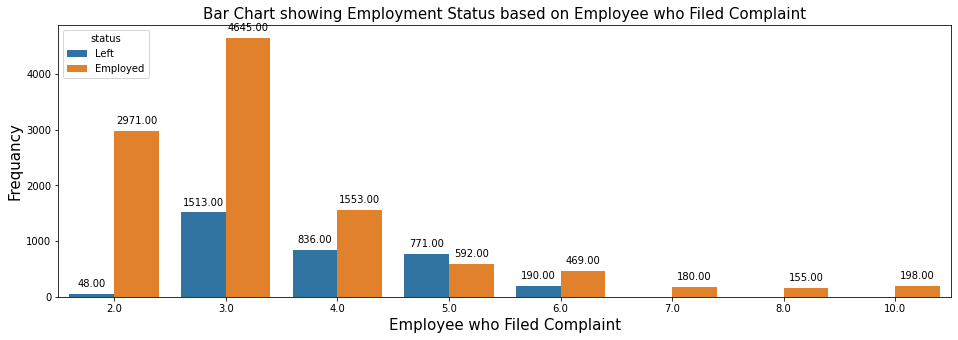

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x = 'tenure', hue = 'status', data = df_final);
plt.xlabel('Employee who Filed Complaint', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Employment Status based on Employee who Filed Complaint', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- If we look at the Tenure of the Employee, we can see that once the employee completed 2 years, it has the tendacny to switch Job and after 6 years, hardly any employee changes jobs.

<a id = Section78></a>
#### 7.8 Analysis of Employment Status with Employee's Promotions

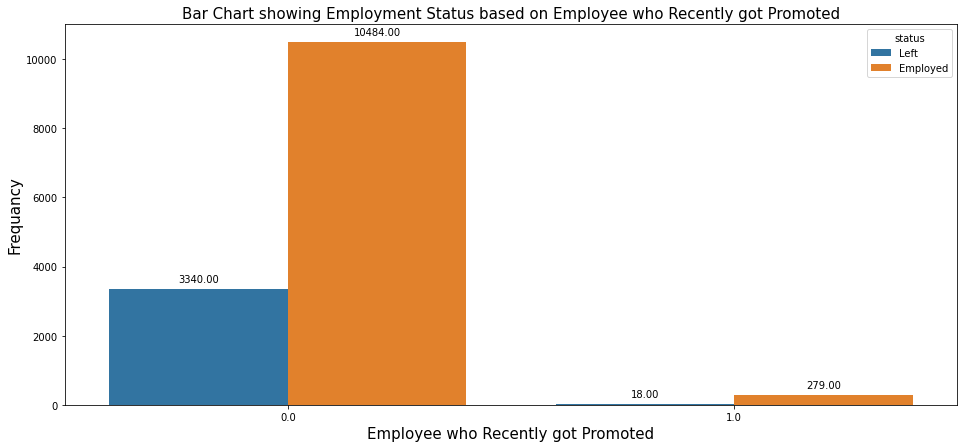

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'recently_promoted', hue = 'status', data = df_final);
plt.xlabel('Employee who Recently got Promoted', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Employment Status based on Employee who Recently got Promoted', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Employee who recently got promoted has much lower attirition rate

<a id = Section79></a>
#### 7.9 Analysis of Employment Status with Employee's Filed Complaint 

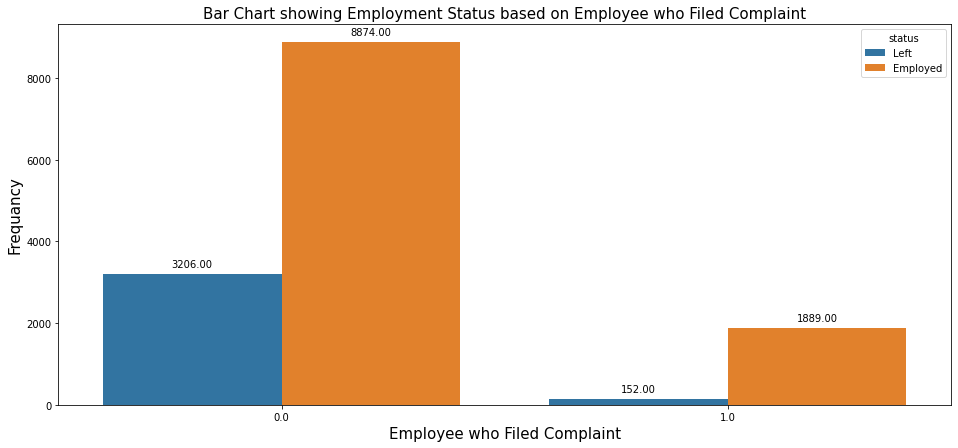

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.countplot(x = 'filed_complaint', hue = 'status', data = df_final);
plt.xlabel('Employee who Filed Complaint', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Employment Status based on Employee who Filed Complaint', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Text(0.5, 1.0, 'Bar Chart showing Department-wise Employment Status')

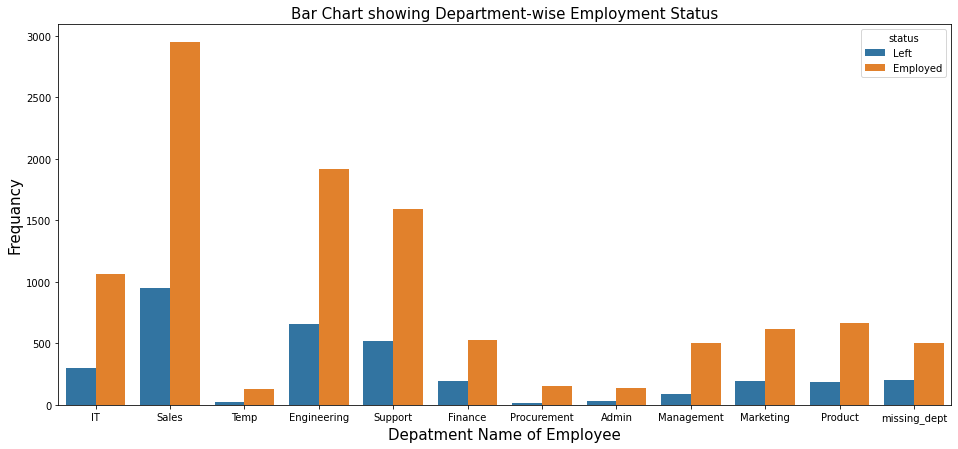

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x = 'dept_name', hue = 'status', data = df_final);
plt.xlabel('Depatment Name of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Department-wise Employment Status', fontsize=15)

Text(0.5, 1.0, 'Bar Chart showing Department-wise Employment Status')

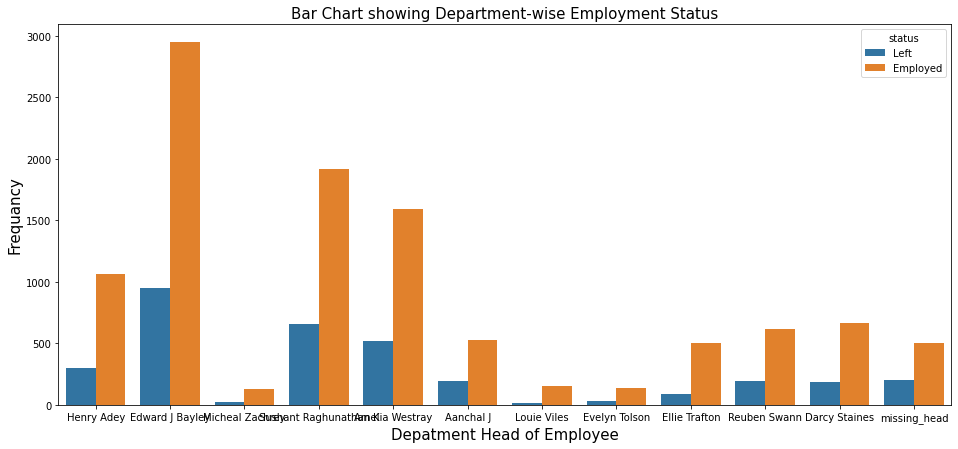

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x = 'dept_head', hue = 'status', data = df_final);
plt.xlabel('Depatment Head of Employee', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Department-wise Employment Status', fontsize=15)

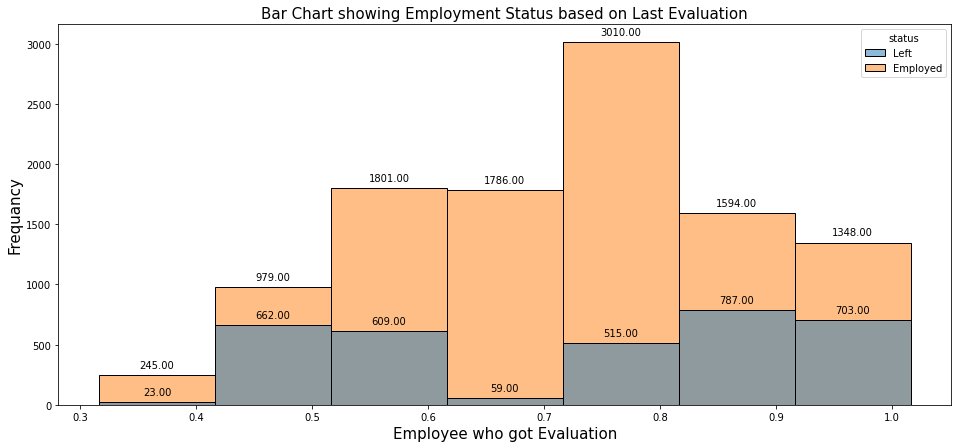

In [ ]:
plt.figure(figsize=(16,7))
ax = sns.histplot(x = 'last_evaluation', hue = 'status', data = df_final, binwidth=0.1);
plt.xlabel('Employee who got Evaluation', fontsize=15)
plt.ylabel('Frequancy', fontsize=15)
plt.title('Bar Chart showing Employment Status based on Last Evaluation', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
df_final.head()

,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,112868,29.0,Female,Married,D00-IT,IT,Henry Adey,244.0,0.0,0.926197,6,0.0,medium,0.061868,Left,5.0
1,122314,36.0,Female,Married,D00-IT,IT,Henry Adey,289.0,0.0,0.929858,7,0.0,low,0.161744,Left,4.0
2,126561,22.0,Female,Unmarried,D00-IT,IT,Henry Adey,235.0,0.0,0.957642,5,0.0,low,0.725715,Left,5.0
3,115017,24.0,Female,Unmarried,D00-IT,IT,Henry Adey,158.0,0.0,0.546333,2,0.0,low,0.391487,Left,3.0
4,112281,28.0,Male,Unmarried,D00-IT,IT,Henry Adey,277.0,0.0,0.949600,2,0.0,medium,0.723212,Left,3.0


In [ ]:
df_final.set_index('employee_id', inplace=True)
df_final.head()

,age,gender,marital_status,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
employee_id,,,,,,,,,,,,,,,
112868,29.0,Female,Married,D00-IT,IT,Henry Adey,244.0,0.0,0.926197,6,0.0,medium,0.061868,Left,5.0
122314,36.0,Female,Married,D00-IT,IT,Henry Adey,289.0,0.0,0.929858,7,0.0,low,0.161744,Left,4.0
126561,22.0,Female,Unmarried,D00-IT,IT,Henry Adey,235.0,0.0,0.957642,5,0.0,low,0.725715,Left,5.0
115017,24.0,Female,Unmarried,D00-IT,IT,Henry Adey,158.0,0.0,0.546333,2,0.0,low,0.391487,Left,3.0
112281,28.0,Male,Unmarried,D00-IT,IT,Henry Adey,277.0,0.0,0.949600,2,0.0,medium,0.723212,Left,3.0


### 7.10 Using Label Encoding for converting Categorical Columns

In [ ]:
df_final['gender'] = df_final['gender'].astype('category').cat.codes
df_final['marital_status'] = df_final['marital_status'].astype('category').cat.codes
df_final['dept_id'] = df_final['dept_id'].astype('category').cat.codes
df_final['dept_name'] = df_final['dept_name'].astype('category').cat.codes
df_final['dept_head'] = df_final['dept_head'].astype('category').cat.codes
df_final['salary'] = df_final['salary'].astype('category').cat.codes
df_final['status'] = df_final['status'].astype('category').cat.codes

In [ ]:
df_final.head()

,age,gender,marital_status,dept_id,dept_name,dept_head,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
employee_id,,,,,,,,,,,,,,,
112868,29.0,0,0,3,3,6,244.0,0.0,0.926197,6,0.0,2,0.061868,1,5.0
122314,36.0,0,0,3,3,6,289.0,0.0,0.929858,7,0.0,1,0.161744,1,4.0
126561,22.0,0,1,3,3,6,235.0,0.0,0.957642,5,0.0,1,0.725715,1,5.0
115017,24.0,0,1,3,3,6,158.0,0.0,0.546333,2,0.0,1,0.391487,1,3.0
112281,28.0,1,1,3,3,6,277.0,0.0,0.949600,2,0.0,2,0.723212,1,3.0


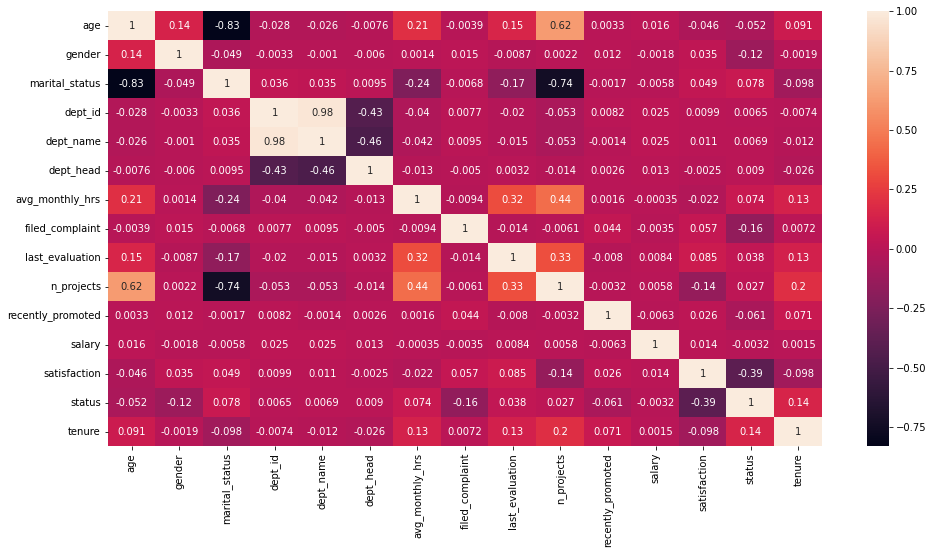

In [ ]:
#df_final.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_final.corr(), annot=True);

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 112868 to 101864
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                14121 non-null  float64
 1   gender             14121 non-null  int8   
 2   marital_status     14121 non-null  int8   
 3   dept_id            14121 non-null  int8   
 4   dept_name          14121 non-null  int8   
 5   dept_head          14121 non-null  int8   
 6   avg_monthly_hrs    14121 non-null  float64
 7   filed_complaint    14121 non-null  float64
 8   last_evaluation    14121 non-null  float64
 9   n_projects         14121 non-null  int64  
 10  recently_promoted  14121 non-null  float64
 11  salary             14121 non-null  int8   
 12  satisfaction       14121 non-null  float64
 13  status             14121 non-null  int8   
 14  tenure             14121 non-null  float64
dtypes: float64(7), int64(1), int8(7)
memory usage: 1.1 MB


- Dropping **dept_name** and **dept_head** as all 3 department column are giving same information

In [ ]:
df_final.drop(['dept_name', 'dept_head'], axis=1, inplace=True)
df_final.head()

,age,gender,marital_status,dept_id,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
employee_id,,,,,,,,,,,,,
112868,29.0,0,0,3,244.0,0.0,0.926197,6,0.0,2,0.061868,1,5.0
122314,36.0,0,0,3,289.0,0.0,0.929858,7,0.0,1,0.161744,1,4.0
126561,22.0,0,1,3,235.0,0.0,0.957642,5,0.0,1,0.725715,1,5.0
115017,24.0,0,1,3,158.0,0.0,0.546333,2,0.0,1,0.391487,1,3.0
112281,28.0,1,1,3,277.0,0.0,0.949600,2,0.0,2,0.723212,1,3.0


---
<a id = Section8></a>
## **8. Building Machine Learning Model for Prediction**

### 8.1 Model Evaluation criteria:



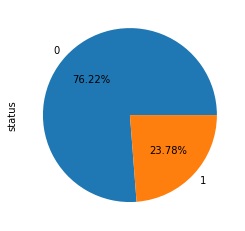

In [ ]:
df_final.status.value_counts().plot(kind = 'pie', autopct='%.2f%%')

- As can be seen from above plot, it is an imbalanced dataset. Thus, only **accuracy** is not the metric to be considered while evaluating model performance.
- Now ***0*** indicates employee staying and ***1*** indicates employee leaving
- Our target is to prepare a model which will reduce chance of People who are actually going to leave (1) to be predicted as they are going stay (0).
- In other words we need to lower our **False Negatives**
- **Recall** is calculated as **TP/(TP + FN)**
- If **Recall** value is higher it means, we will have low FN and thereby will be able to correctly identify employees who are going to leave and take appropriate action accordingly

In [ ]:
#      0   1
# 0   TN  FP
# 1   FN  TP

# 0: not leave
# 1: leave
# aim: people who r actually ging to leave (1) but marked as not leave (0): act = 1, pred = 0


### 8.2 Model Building

#### 8.2.1 Train Test Split

In [ ]:
X = df_final.loc[:,df_final.columns != 'status']
y = df_final.status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of X train is", X_train.shape)
print("Shape of X test is", X_test.shape)
print("Shape of y train is", y_train.shape)
print("Shape of y test is", y_test.shape)

Shape of X train is (11296, 12)
Shape of X test is (2825, 12)
Shape of y train is (11296,)
Shape of y test is (2825,)


### 8.3 Preparing Functions to calculate results and result table
- Function to provide Accuracy & Recall score values for a model
- Another function to append previous results table for every new model result's table

In [ ]:
# making a function which will fit, predict, calculate results and append it into results table

from sklearn.metrics import accuracy_score, recall_score

def get_results(classifier, X_train, y_train):
    model = classifier.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test) 
       
    accuracy_train = accuracy_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)  
    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    
    return accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model

In [ ]:
# Function to add current result's info into previous results table
def result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test):
    global results
    tempResults = pd.DataFrame({
        'Algorithm':[algo], 
        'Accuracy train':[accuracy_train], 'Accuracy test':[accuracy_test],  
        'Recall_score train':[recall_train], 'Recall_score test':[recall_test]
        })
    results = pd.concat([results, tempResults])
    results = results[['Algorithm', 'Accuracy train', 'Accuracy test', 'Recall_score train', 'Recall_score test']]   

### 8.4 ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

import pickle


# pickle.dump(model2, open('/content/drive/MyDrive/INSAID Projects/06 Capstone 2 - GCD/Employee churn prediction GIT.ipynb/model2.pkl', 'wb'))

<a id = Section81></a>
#### 8.4.1 Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
 
algo = "Logistic Regression"
classifier = LogisticRegression(class_weight='balanced')

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
model1 = model

In [ ]:
results = pd.DataFrame({
        'Algorithm':[algo], 
        'Accuracy train':[accuracy_train], 'Accuracy test':[accuracy_test],  
        'Recall_score train':[recall_train], 'Recall_score test':[recall_test]
        })
results = results[['Algorithm', 'Accuracy train', 'Accuracy test', 'Recall_score train', 'Recall_score test']]   
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.79318,0.789394


#### 8.4.2 Decision Trees

In [ ]:
algo = "Decision Tree"

classifier = DecisionTreeClassifier(class_weight='balanced')

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model2 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.79318,0.789394
1,Decision Tree,1.000000,0.957876,1.00000,0.906061


#### 8.4.3 Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
algo = "Random Forest"

classifier = RandomForestClassifier(n_estimators=100, random_state = 42, class_weight='balanced')

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model3 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.79318,0.789394
1,Decision Tree,1.000000,0.957876,1.00000,0.906061
2,Random Forest,0.999911,0.970973,1.00000,0.890909


#### 8.4.4 Ensemble: Stacking 

In [ ]:
algo = "Stacking"

estimators = [('knn', KNeighborsClassifier(n_neighbors=2, n_jobs = -1)),
              ('rf', RandomForestClassifier(n_estimators=200, random_state=69, n_jobs = -1)),
              ('GNB', GaussianNB())
             ]

classifier = StackingClassifier(estimators=estimators, 
                                final_estimator=LogisticRegression(class_weight='balanced', n_jobs = -1),
                               n_jobs=-1, cv=5)


accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model4a = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.79318,0.789394
1,Decision Tree,1.000000,0.957876,1.00000,0.906061
2,Random Forest,0.999911,0.970973,1.00000,0.890909
3,Stacking,0.998849,0.972035,1.00000,0.921212


In [ ]:
algo = "Stacking"

estimators = [('dt', DecisionTreeClassifier(random_state = 69, class_weight='balanced')),
              ('rf', RandomForestClassifier(n_estimators=200, random_state=69, n_jobs = -1)),
              ('svc', SVC(random_state = 69, class_weight = 'balanced', probability = True))
             ]

classifier = StackingClassifier(estimators=estimators, 
                                final_estimator= GradientBoostingClassifier(n_estimators=500, random_state = 69),
                               n_jobs=-1, cv=5)

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model4b = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576


#### 8.4.5 Ensemble: Voting 

In [ ]:
algo = "Voting"

log_clf = LogisticRegression(class_weight='balanced', n_jobs = -1)
sv_clf = SVC(random_state = 69, class_weight = 'balanced', probability = True)
dt_clf = DecisionTreeClassifier(random_state = 69, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state=69, n_jobs=-1, class_weight='balanced')


classifier = VotingClassifier(estimators= [('lr', log_clf), ('rf', rf_clf), ('svc', sv_clf), ('dt', dt_clf)], voting = 'soft')

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model5 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485


#### 8.4.6 Ensemble: Bagging 

In [ ]:
algo = "Bagging"

# log_clf = LogisticRegression(class_weight='balanced', n_jobs = -1)
# sv_clf = SVC(random_state = 69, class_weight = 'balanced', probability = True)
dt_clf = DecisionTreeClassifier(random_state = 69, class_weight='balanced')
#rf_clf = RandomForestClassifier(n_estimators=500, random_state=69, n_jobs=-1, class_weight='balanced')

classifier = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=69)

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model6 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485


#### 8.4.7 Ensemble: AdaBoost 

In [ ]:
algo = "AdaBoost"

# log_clf = LogisticRegression(class_weight='balanced', n_jobs = -1)
# sv_clf = SVC(random_state = 69, class_weight = 'balanced', probability = True)
dt_clf = DecisionTreeClassifier(random_state = 69, class_weight='balanced')
#rf_clf = RandomForestClassifier(n_estimators=500, random_state=69, n_jobs=-1, class_weight='balanced')


classifier = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=69)

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model7 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545


#### 8.4.8 Ensemble: Gradient Boosting 

In [ ]:
algo = "Gradient Boosting"

classifier = GradientBoostingClassifier(n_estimators=500, random_state = 69)

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model8 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545
8,Gradient Boosting,0.986544,0.967788,0.959970,0.901515


#### 8.4.9 K-Nearest Neighbours

In [ ]:
algo = "K-Nearest Neighbours"

classifier = KNeighborsClassifier(n_neighbors = 5)

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model9 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545
8,Gradient Boosting,0.986544,0.967788,0.959970,0.901515
9,K-Nearest Neighbours,0.928382,0.893097,0.849889,0.762121


#### 8.4.10 Naive Bayes

In [ ]:
algo = "Naive Bayes"

classifier = GaussianNB()

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model10 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545
8,Gradient Boosting,0.986544,0.967788,0.959970,0.901515
9,K-Nearest Neighbours,0.928382,0.893097,0.849889,0.762121


#### 8.4.11 Support Vector Machine

In [ ]:
algo = "Support Vector Machine"

classifier = SVC()

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model11 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545
8,Gradient Boosting,0.986544,0.967788,0.959970,0.901515
9,K-Nearest Neighbours,0.928382,0.893097,0.849889,0.762121


#### 8.4.12 eXtreme Gradient Boosting

In [ ]:
algo = "XGBoost"

classifier = XGBClassifier()

accuracy_train, accuracy_test, recall_train, recall_test, y_pred_test, model = get_results(classifier, X_train, y_train)
final_result = result_table(algo, accuracy_train, accuracy_test, recall_train, recall_test)
model12 = model
results = results.reset_index(drop=True)
results

,Algorithm,Accuracy train,Accuracy test,Recall_score train,Recall_score test
0,Logistic Regression,0.757967,0.747257,0.793180,0.789394
1,Decision Tree,1.000000,0.957876,1.000000,0.906061
2,Random Forest,0.999911,0.970973,1.000000,0.890909
3,Stacking,0.998849,0.972035,1.000000,0.921212
4,Stacking,0.997079,0.969204,0.997776,0.907576
5,Voting,0.998761,0.968850,0.994811,0.898485
6,Bagging,1.000000,0.972389,1.000000,0.898485
7,AdaBoost,1.000000,0.960000,1.000000,0.904545
8,Gradient Boosting,0.986544,0.967788,0.959970,0.901515
9,K-Nearest Neighbours,0.928382,0.893097,0.849889,0.762121


<a id = Section9></a>
## **9. Observation** 

- After modeling various Machine Learning Algorithms, the best Recall score is obtained for Stacking - Ensemble ML model and the same shall be used for deployment
- Saving model file as pickle for inferencing

In [ ]:
pickle.dump(model4a, open('/content/drive/MyDrive/.../model.pkl', 'wb'))

## **10. Inferencing**

- Taking Input from User

In [ ]:
X_train.head()

,age,gender,marital_status,dept_id,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
employee_id,,,,,,,,,,,,
105373,34.0,1,0,1,184.0,1.0,0.731885,5,0.0,1,0.703019,4.0
104175,43.0,1,0,11,184.0,0.0,0.625576,5,0.0,1,0.578368,3.0
102174,24.0,1,1,9,143.0,0.0,0.735270,3,0.0,2,0.511181,4.0
113888,25.0,0,1,3,199.0,0.0,0.943386,3,0.0,2,0.899690,4.0
108052,23.0,1,1,8,213.0,0.0,0.523709,3,0.0,1,0.574913,4.0


In [ ]:
dept_name = ['IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance', 'Procurement', 'Admin', 'Management', 'Marketing', 'Product']
dept_id = list(range(len(dept_name)))

dept_data = pd.DataFrame({'dept_name' : dept_name, 'dept_id': dept_id })
dept_data

,dept_name,dept_id
0,IT,0
1,Sales,1
2,Temp,2
3,Engineering,3
4,Support,4
5,Finance,5
6,Procurement,6
7,Admin,7
8,Management,8
9,Marketing,9


In [ ]:
age = 22
gender = "Male"
marital_status = "Married"
dept_name = "IT"
avg_monthly_hrs = 260
filed_complaint = "No"
last_evaluation = 0.03659745
n_projects = 5
recently_promoted = "No"
salary = "high"
satisfaction = 0.0426659
tenure = 2

In [ ]:
#converting the categorical values to numbers:
if gender == "Male":
  gender = 1
else:
  gender = 0

if marital_status == "Married":
  marital_status = 0
else:
  marital_status =1

dept_name = dept_data[(dept_data['dept_name'] == dept_name)]['dept_id']

if filed_complaint == "Yes":
  filed_complaint = 1
else:
  filed_complaint = 0

if recently_promoted == "Yes":
  recently_promoted = 1
else:
  recently_promoted = 0

if salary == "High":
  salary = 0
elif salary == 'Medium':
  salary = 2
else:
  salary = 1

# filed_complaint = 0 #1 for yes
# recently_promoted = 0 #1 for yes
# salary = 1    #med = 2, low = 1, high = 0

In [ ]:
data = {
    'age': [age], 'gender': [gender] , 'marital_status' : [marital_status], 
    'dept_id' : [dept_name] , 'avg_monthly_hrs' : [avg_monthly_hrs], 'filed_complaint' : [filed_complaint], 
    'last_evaluation' : [last_evaluation], 'n_projects' : [n_projects], 'recently_promoted' : [recently_promoted],
    'salary' : [salary], 'satisfaction' : [satisfaction], 'tenure' : [tenure]    

}

user_data = pd.DataFrame(data)


In [ ]:
with open('/content/drive/MyDrive/.../model.pkl', 'rb') as file:      
    # Call load method to deserialze
    model_to_predict = pickle.load(file)

In [ ]:
prediction = model_to_predict.predict(user_data)
if prediction == 0:
  print("Will Stay")
else:
  print("Will Leave")


Will Leave


## **11. Conclusion**

- The model developed is able to correctly predict whether an employee will leave the organization based on the given parameters.